# G2M insight for Cab Investment firm

## G2M Case Study

## The Client:

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

## Project detail:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. 

## Data Set:

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

**Cab_Data.csv** – this file includes details of transaction for 2 cab companies

**Customer_ID.csv** – this is a mapping table that contains a unique identifier which links the customer’s demographic details

**Transaction_ID.csv** – this is a mapping table that contains transaction to customer mapping and payment mode

**City.csv** – this file contains list of US cities, their population and number of cab users

You should fully investigate and understand each data set.

* Review the Source Documentation
* Understand the field names and data types
* Identify relationships across the files
* Field/feature transformations
* Determine which files should be joined versus which ones should be appended
* Create master data and explain the relationship
* Identify and remove duplicates
* Perform other analysis like NA value and outlier detection

## Import the required Libraries

In [1]:
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## Read the Dataset

In [2]:
Cab_Data = pd.read_csv('Cab_Data.csv')
Customer_ID =  pd.read_csv("Customer_ID.csv")
Transaction_ID = pd.read_csv("Transaction_ID.csv")
City = pd.read_csv("City.csv")

In [3]:
Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
Transaction_ID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [5]:
Customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
City.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [7]:
# Check the shape of all the datasets
print("shape of Cab_Data", Cab_Data.shape)
print("shape of Customer_ID", Customer_ID.shape)
print("shape of Transaction_ID", Transaction_ID.shape)
print("shape of City Data", City.shape)

shape of Cab_Data (359392, 7)
shape of Customer_ID (49171, 4)
shape of Transaction_ID (440098, 3)
shape of City Data (20, 3)


In [8]:
# Basic information (Summary Statistics)
print(Cab_Data.info())
print(Customer_ID.info())
print(Transaction_ID.info())
print(City.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int6

## Data Cleaning

In [9]:
for col in Cab_Data.columns:
    if ' ' in col:
        Cab_Data = Cab_Data.rename(columns={col:col.replace(' ','_')})

In [10]:
Cab_Data.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip'],
      dtype='object')

In [11]:
for col in Transaction_ID.columns:
    if ' ' in col:
        Transaction_ID = Transaction_ID.rename(columns={col:col.replace(' ','_')})

In [12]:
Transaction_ID.columns

Index(['Transaction_ID', 'Customer_ID', 'Payment_Mode'], dtype='object')

In [13]:
for col in Customer_ID.columns:
    if ' ' in col:
        Customer_ID = Customer_ID.rename(columns={col:col.replace(' ','_')})

In [14]:
Customer_ID.columns

Index(['Customer_ID', 'Gender', 'Age', 'Income_(USD/Month)'], dtype='object')

In [15]:
Cab_Data.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [16]:
# change the date of travel to standard form

In [17]:
from datetime import datetime, timedelta
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [18]:
Cab_Data['Date_of_Travel'] = Cab_Data['Date_of_Travel'].apply(lambda x:to_date_format(x))

In [19]:
Cab_Data.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [20]:
# now split the date to day, month and year

In [21]:
months=[]
years =[]
for i in range(len(Cab_Data['Date_of_Travel'])):
    months.append(Cab_Data['Date_of_Travel'][i].month)
    years.append(Cab_Data['Date_of_Travel'][i].year)
Cab_Data['Month'] = months
Cab_Data['Year'] = years

Cab_Data.drop('Date_of_Travel', axis=1, inplace=True)

In [22]:
Cab_Data.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016


In [23]:
# we got the cab data with month and year

In [24]:
# before doing EDA, let's split the dataset into Pink Cab and Yellow Cab for clear understanding between the two
PinkCab = Cab_Data[Cab_Data['Company']=='Pink Cab']
YellowCab = Cab_Data[Cab_Data['Company']=='Yellow Cab']

In [25]:
Cab_Data['Year'].unique()

array([2016, 2017, 2018], dtype=int64)

### Monthly Transaction analysis over 3 years

In [26]:
plot0 = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby(['Month']).Transaction_ID.count()
plot0

Month
1      4825
2      3392
3      4228
4      4140
5      5023
6      5820
7      6585
8      8061
9      9647
10    10366
11    11324
12    11300
Name: Transaction_ID, dtype: int64

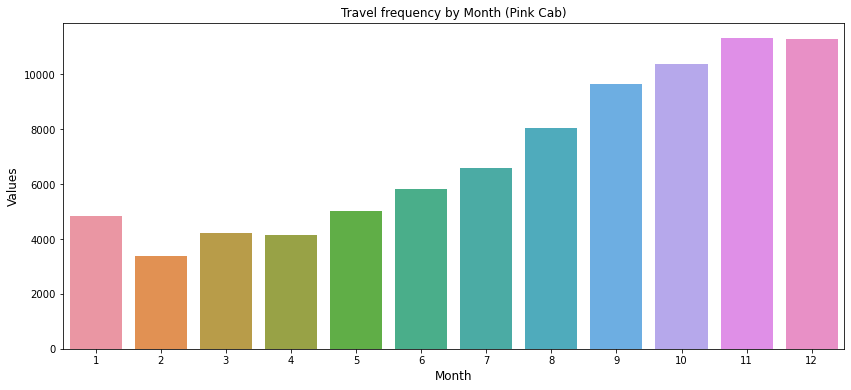

In [27]:
plt.figure(figsize=(14,6))
sns.barplot(x=plot0.index,y=plot0.values)
plt.title('Travel frequency by Month (Pink Cab)',fontsize = 12)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Values',fontsize = 12)
plt.show()

In [28]:
plot1 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby(['Month']).Transaction_ID.count()
plot1

Month
1     17468
2     14928
3     17516
4     17535
5     18809
6     18656
7     21074
8     24328
9     27356
10    29609
11    32609
12    34793
Name: Transaction_ID, dtype: int64

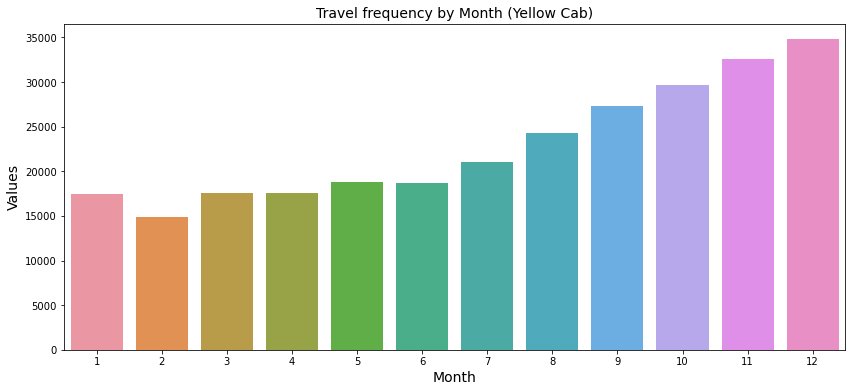

In [29]:
plt.figure(figsize=(14,6))
sns.barplot(x=plot1.index,y=plot1.values)
plt.title('Travel frequency by Month (Yellow Cab)',fontsize = 14)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Values',fontsize = 14)
plt.show()

>**Yellow Cab has higher travels (35000) in the month of December which is the holiday season compared to Pink Cab (11000).**

In [30]:
overall_distance = Cab_Data['KM_Travelled'].describe()
PinkCab_distance = PinkCab['KM_Travelled'].describe()
YellowCab_distance = YellowCab['KM_Travelled'].describe()

In [31]:
df = pd.DataFrame({'Overall': overall_distance.values,
                  'PinkCab': PinkCab_distance.values,
                  'YellowCab': YellowCab_distance.values}, index= ['Count', 'Mean', 'Std. Dev.', 'Min', '25%', '50%', '75%', 'Max'])
df

,Overall,PinkCab,YellowCab
Count,359392.000000,84711.000000,274681.000000
Mean,22.567254,22.559917,22.569517
Std. Dev.,12.233526,12.231092,12.234298
Min,1.900000,1.900000,1.900000
25%,12.000000,12.000000,11.990000
50%,22.440000,22.440000,22.440000
75%,32.960000,32.960000,32.960000
Max,48.000000,48.000000,48.000000


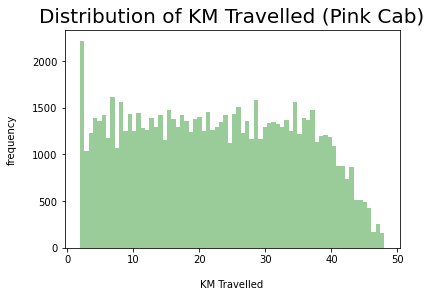

In [32]:
ax = sns.distplot(PinkCab['KM_Travelled'], kde=False, color='green', bins=70)
plt.title("Distribution of KM Travelled (Pink Cab)", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

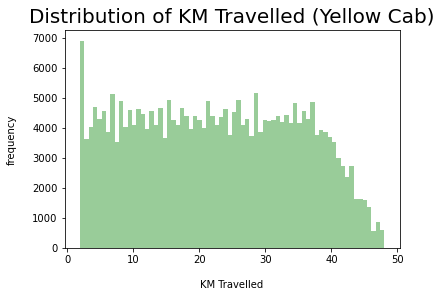

In [33]:
ax = sns.distplot(YellowCab['KM_Travelled'], kde=False, color='green',bins=70)
plt.title("Distribution of KM Travelled (Yellow Cab)", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15);

>**From the above graphs, we can see that most of the rides are in the range of approximately 2 to 48 KM for both the cabs.**

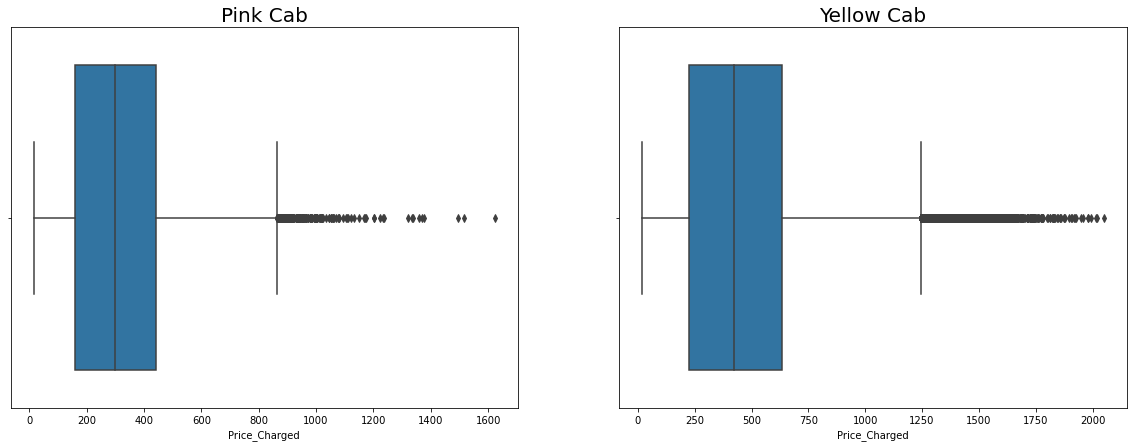

In [34]:
# price charged by both the cabs
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,7))
sns.boxplot(PinkCab['Price_Charged'], ax=ax1)
ax1.set_title('Pink Cab', fontsize=20)
sns.boxplot(YellowCab['Price_Charged'], ax=ax2)
ax2.set_title('Yellow Cab', fontsize=20)
plt.show()

**Outliers**

>These outliers are due to use of high-end cars so decided to keep it.

>The price charge range for Yellow cab is more than the Pink cab.


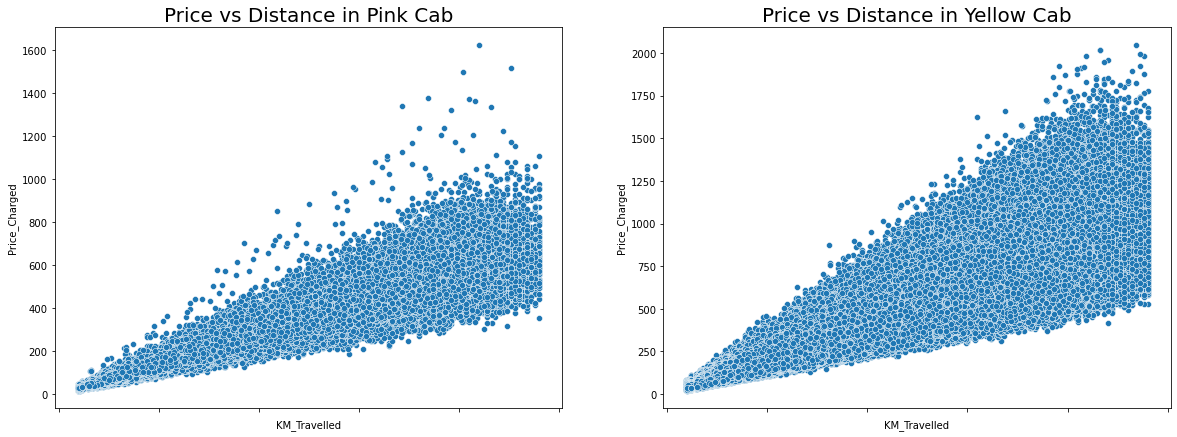

In [35]:
# price vs distance for both the cabs

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7))
sns.scatterplot(PinkCab['KM_Travelled'], PinkCab['Price_Charged'], ax=ax1)
ax1.set_title('Price vs Distance in Pink Cab', fontsize=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=15)
sns.scatterplot(YellowCab['KM_Travelled'], YellowCab['Price_Charged'], ax=ax2)
ax2.set_title('Price vs Distance in Yellow Cab', fontsize=20)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=15)
plt.show()

In [36]:
PinkCab['KM_Travelled'].corr(PinkCab['Price_Charged'])

0.9277652782594866

In [37]:
YellowCab['KM_Travelled'].corr(YellowCab['Price_Charged'])

0.859708629447848

>* Distance is one of the important factors, which drives the price of the rides. 
>* We could see that there is a positive correlation in the graph for both Pink and Yellow cab.
>* The price for Yellow cab is higher compared to Pink cab.

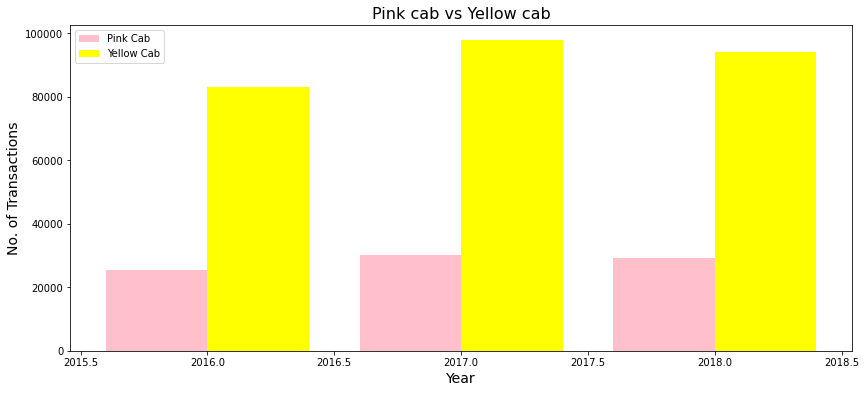

In [38]:
# number of transactions for yellow and pink cabs throughout the years

plot1 = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
plot2 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1.values, width=0.4, color='pink', align='center',label='Pink Cab')
ax.bar(plot1.index+0.2, plot2.values, width=0.4, color='yellow', align='center',label='Yellow Cab')
plt.title("Pink cab vs Yellow cab",fontsize = 16)
plt.ylabel('No. of Transactions',fontsize = 14)
plt.xlabel('Year',fontsize = 14)
plt.legend()
plt.show()

> **From the graph it shows that on yearly basis no. of transactions for Yellow cab is higher than Pink cab.**

### Pink Cab

In [39]:
# cost of the trip and price charged for the pink cab

In [40]:
Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()

Year
2016    315.850071
2017    315.535059
2018    301.538134
Name: Price_Charged, dtype: float64

In [41]:
Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('Year').Cost_of_Trip.mean()

Year
2016    247.039209
2017    248.820917
2018    248.413839
Name: Cost_of_Trip, dtype: float64

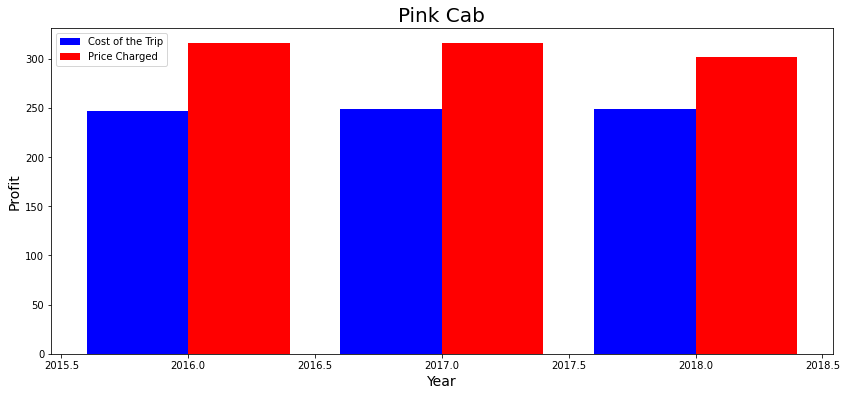

In [42]:
plot1 = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
plot3 = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()
plot4 = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot4.values, width=0.4, color='blue', align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, plot3.values, width=0.4, color='red', align='center',label='Price Charged')
plt.ylabel('Profit',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.title('Pink Cab', fontsize=20)
plt.legend()
plt.show()

### Yellow cab

In [43]:
# cost of the trip and price charged for yellow cab

In [44]:
Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()

Year
2016    468.230462
2017    466.278438
2018    440.893159
Name: Price_Charged, dtype: float64

In [45]:
Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()

Year
2016    298.536761
2017    297.861544
2018    297.442400
Name: Cost_of_Trip, dtype: float64

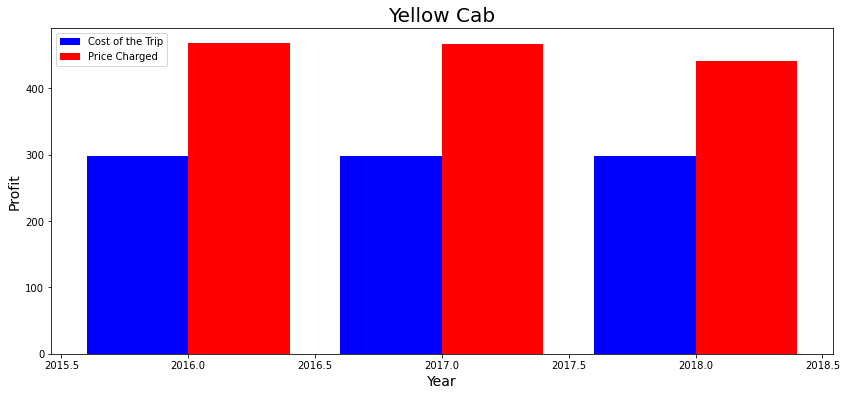

In [46]:
plot1 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
plot3 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()
plot4 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot4.values, width=0.4, color='blue', align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, plot3.values, width=0.4, color='red', align='center',label='Price Charged')
plt.ylabel('Profit', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Yellow Cab', fontsize=20)
plt.legend()
plt.show()

>**The Yellow cab has a higher Profit Margin (Price Charged - Cost of Trip) compared to Pink cab**

In [47]:
# cost of the trip as per KM 

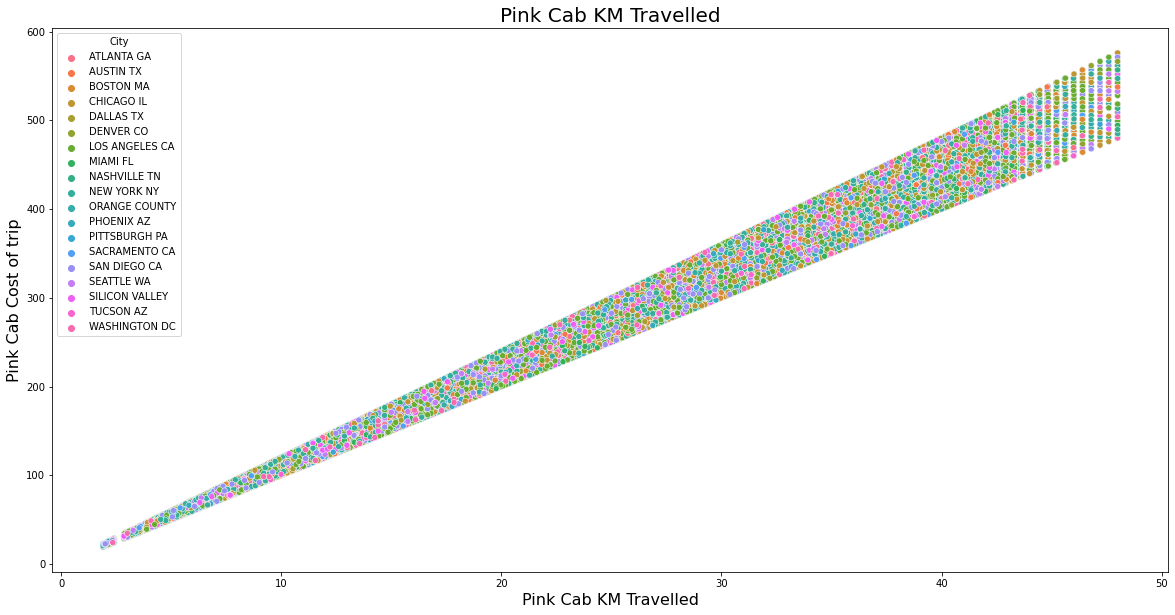

In [48]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=Cab_Data, x=PinkCab["KM_Travelled"], y=PinkCab['Cost_of_Trip'], hue="City")
plt.title('Pink Cab KM Travelled',fontsize = 20)
plt.ylabel('Pink Cab Cost of trip',fontsize = 16)
plt.xlabel('Pink Cab KM Travelled',fontsize = 16)
plt.show()

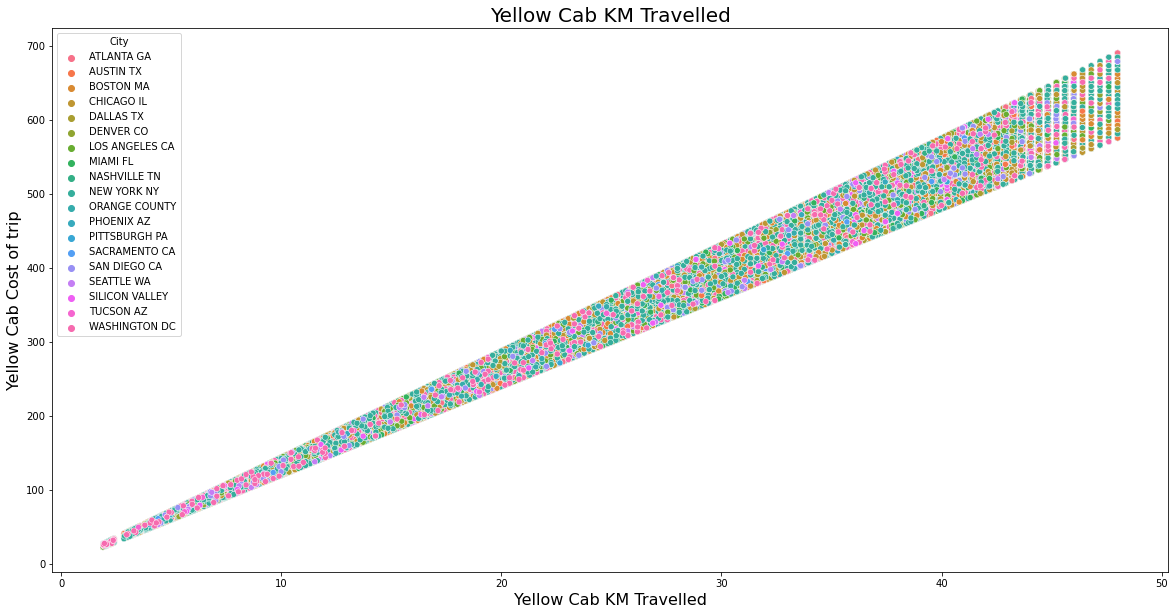

In [49]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=Cab_Data, x=YellowCab["KM_Travelled"], y=YellowCab['Cost_of_Trip'], hue="City")
plt.title('Yellow Cab KM Travelled',fontsize = 20)
plt.ylabel('Yellow Cab Cost of trip',fontsize = 16)
plt.xlabel('Yellow Cab KM Travelled',fontsize = 16)
plt.show()

> **From the graph we see that the cost of trip for both Pink and Yellow cab are almost the same.**

In [50]:
# Price charged as per KM travelled

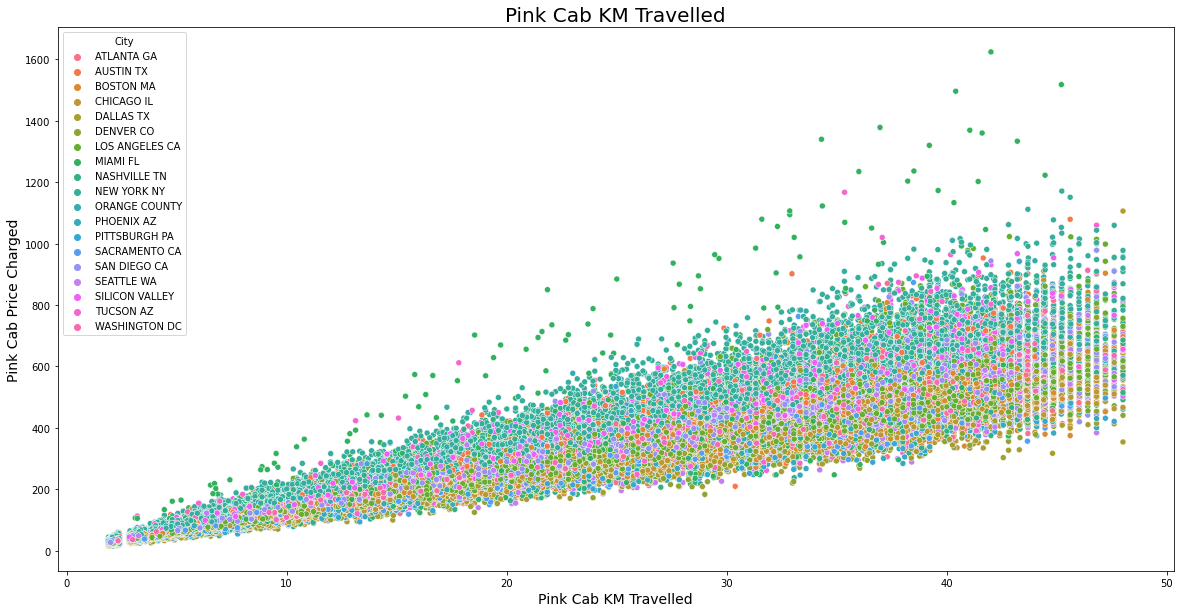

In [51]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=Cab_Data, x=PinkCab["KM_Travelled"], y=PinkCab['Price_Charged'], hue="City")
plt.title('Pink Cab KM Travelled',fontsize = 20)
plt.ylabel('Pink Cab Price Charged',fontsize = 14)
plt.xlabel('Pink Cab KM Travelled',fontsize = 14)
plt.show()

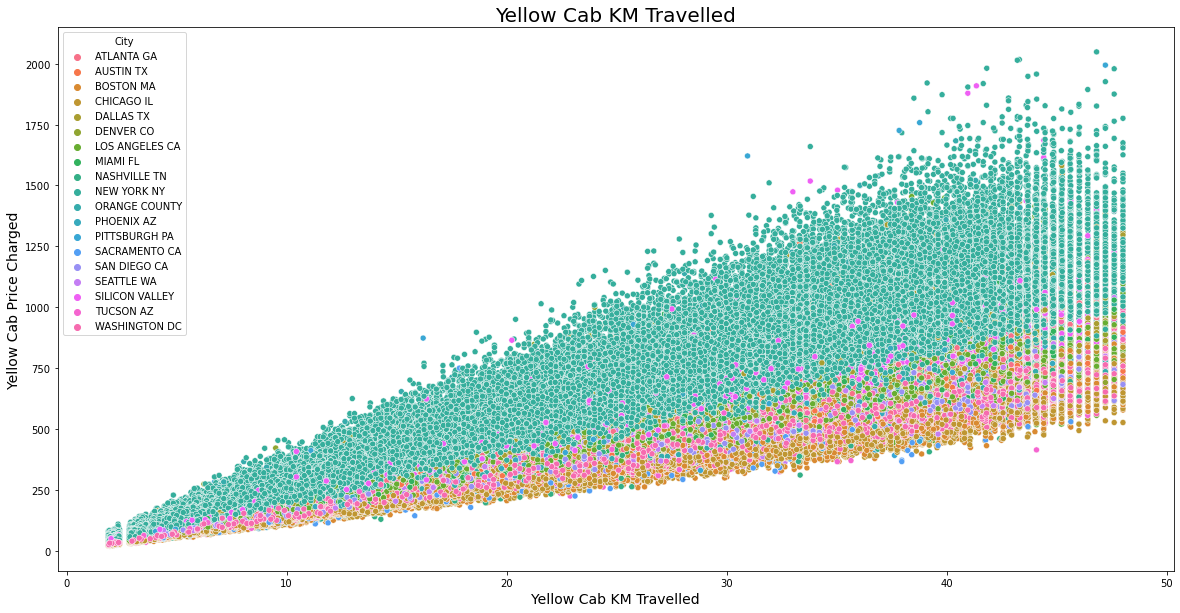

In [52]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=Cab_Data, x=YellowCab["KM_Travelled"], y=YellowCab['Price_Charged'], hue="City")
plt.title('Yellow Cab KM Travelled',fontsize = 20)
plt.ylabel('Yellow Cab Price Charged',fontsize = 14)
plt.xlabel('Yellow Cab KM Travelled',fontsize = 14)
plt.show()

> * From the graphs we see that for New York City the Yellow Cab price charged is more in comparison to the other cities. 
> * and for Pink cab all the cities have the same increase in prices with increase in distance 
> * the outliers exist in both the graphs  which may be due to high end cars or weather.

## Create the Master Data

In [53]:
left = Cab_Data.set_index(['Transaction_ID'])
right = Transaction_ID.set_index(['Transaction_ID'])
data = left.join(right)
data.head()

,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Payment_Mode
Transaction_ID,,,,,,,,,
10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016,29290,Card
10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016,27703,Card
10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016,28712,Cash
10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016,28020,Cash
10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016,27182,Card


In [54]:
left = data.set_index([data.index,'Customer_ID'])
right = Customer_ID.set_index(['Customer_ID'])
data = left.join(right)
data.head()

,,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month)
Transaction_ID,Customer_ID,,,,,,,,,,,
10000011,29290,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016,Card,Male,28,10813
10000012,27703,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016,Card,Male,27,9237
10000013,28712,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016,Cash,Male,53,11242
10000014,28020,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016,Cash,Male,23,23327
10000015,27182,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016,Card,Male,33,8536


In [55]:
left = data.set_index([data.index,'City'])
right = City.set_index(['City'])
data = left.join(right)
data.head()

,,,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
Transaction_ID,Customer_ID,City,,,,,,,,,,,,
10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.635,1,2016,Card,Male,28,10813,"814,885","24,701"
10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.854,1,2016,Card,Male,27,9237,"814,885","24,701"
10000013,28712,ATLANTA GA,Pink Cab,9.04,125.20,97.632,1,2016,Cash,Male,53,11242,"814,885","24,701"
10000014,28020,ATLANTA GA,Pink Cab,33.17,377.40,351.602,1,2016,Cash,Male,23,23327,"814,885","24,701"
10000015,27182,ATLANTA GA,Pink Cab,8.73,114.62,97.776,1,2016,Card,Male,33,8536,"814,885","24,701"


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 359392 entries, (10000011, 29290, 'ATLANTA GA') to (10440107, 52917, 'WASHINGTON DC')
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Company             359392 non-null  object 
 1   KM_Travelled        359392 non-null  float64
 2   Price_Charged       359392 non-null  float64
 3   Cost_of_Trip        359392 non-null  float64
 4   Month               359392 non-null  int64  
 5   Year                359392 non-null  int64  
 6   Payment_Mode        359392 non-null  object 
 7   Gender              359392 non-null  object 
 8   Age                 359392 non-null  int64  
 9   Income_(USD/Month)  359392 non-null  int64  
 10  Population          359392 non-null  object 
 11  Users               359392 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 48.2+ MB


In [57]:
data = data.reset_index()

In [58]:
data.head()

,Transaction_ID,Customer_ID,City,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
0,10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.635,1,2016,Card,Male,28,10813,"814,885","24,701"
1,10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.854,1,2016,Card,Male,27,9237,"814,885","24,701"
2,10000013,28712,ATLANTA GA,Pink Cab,9.04,125.20,97.632,1,2016,Cash,Male,53,11242,"814,885","24,701"
3,10000014,28020,ATLANTA GA,Pink Cab,33.17,377.40,351.602,1,2016,Cash,Male,23,23327,"814,885","24,701"
4,10000015,27182,ATLANTA GA,Pink Cab,8.73,114.62,97.776,1,2016,Card,Male,33,8536,"814,885","24,701"


In [59]:
data = data.rename(columns={'Income_(USD/Month)':'Income'})
city_users = data.groupby('City').Users.count()
city_users

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Users, dtype: int64

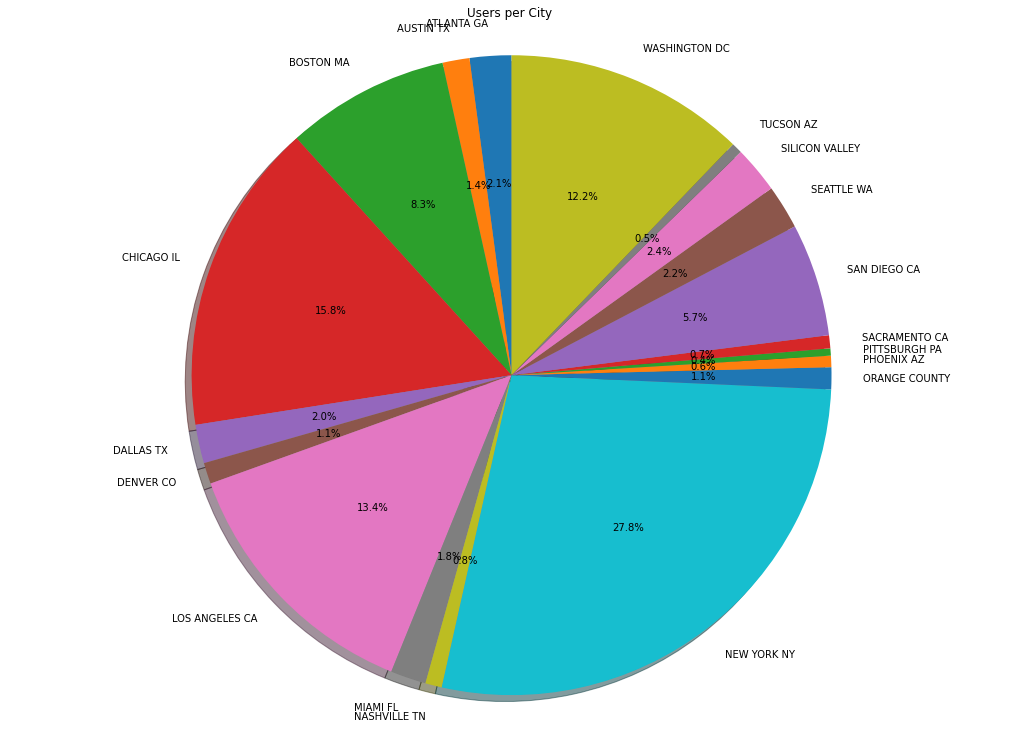

In [60]:
labs = city_users.index
vals = city_users.values
figp, axp = plt.subplots(figsize=(18,13))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')
plt.title('Users per City')
plt.show()

> **New York City has the highest Cab users with 28% followed by Chicago with 16% and Los Angeles with 13%**

In [61]:
# yellow cab

In [62]:
city_y = data[data.Company=='Yellow Cab'].groupby('City').Transaction_ID.count()
city_y

City
ATLANTA GA         5795
AUSTIN TX          3028
BOSTON MA         24506
CHICAGO IL        47264
DALLAS TX          5637
DENVER CO          2431
LOS ANGELES CA    28168
MIAMI FL           4452
NASHVILLE TN       1169
NEW YORK NY       85918
ORANGE COUNTY      2469
PHOENIX AZ         1200
PITTSBURGH PA       631
SACRAMENTO CA      1033
SAN DIEGO CA       9816
SEATTLE WA         5265
SILICON VALLEY     4722
TUCSON AZ          1132
WASHINGTON DC     40045
Name: Transaction_ID, dtype: int64

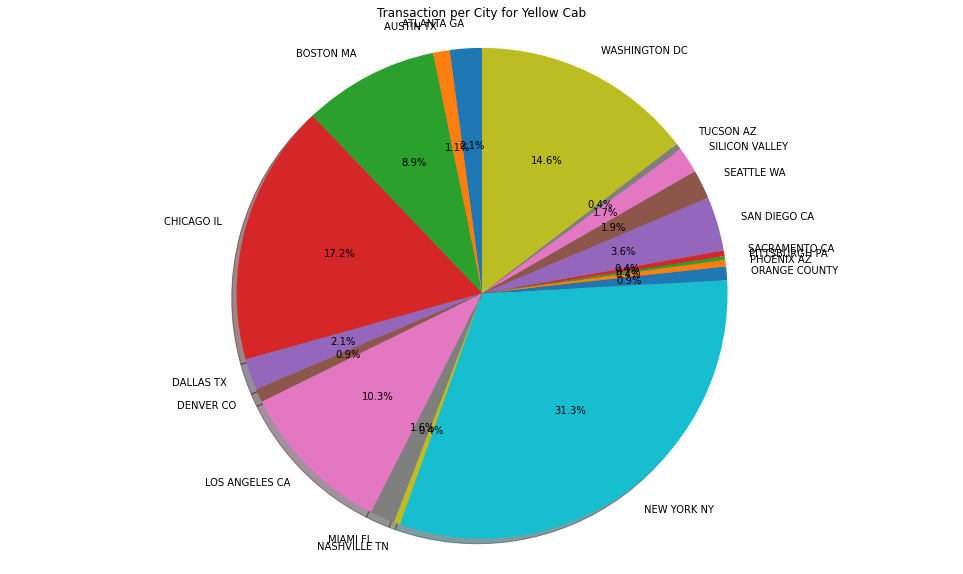

In [63]:
labs = city_y.index
vals = city_y.values
figp, axp = plt.subplots(figsize=(17,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Transaction per City for Yellow Cab')
plt.show()

In [64]:
city_p = data[data.Company=='Pink Cab'].groupby('City').Transaction_ID.count()
city_p

City
ATLANTA GA         1762
AUSTIN TX          1868
BOSTON MA          5186
CHICAGO IL         9361
DALLAS TX          1380
DENVER CO          1394
LOS ANGELES CA    19865
MIAMI FL           2002
NASHVILLE TN       1841
NEW YORK NY       13967
ORANGE COUNTY      1513
PHOENIX AZ          864
PITTSBURGH PA       682
SACRAMENTO CA      1334
SAN DIEGO CA      10672
SEATTLE WA         2732
SILICON VALLEY     3797
TUCSON AZ           799
WASHINGTON DC      3692
Name: Transaction_ID, dtype: int64

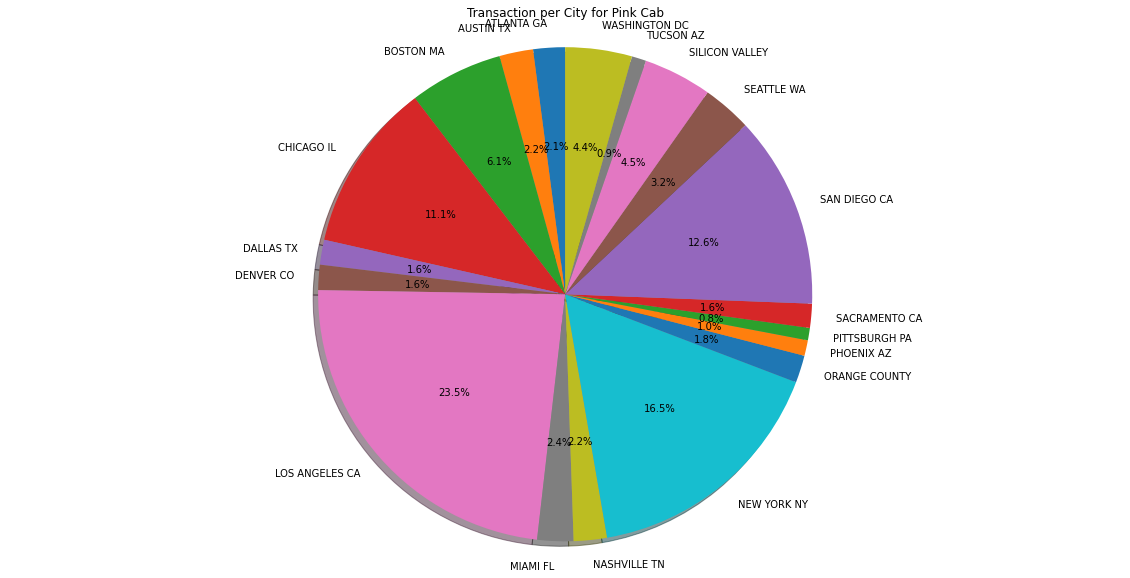

In [65]:
labs = city_p.index
vals = city_p.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Transaction per City for Pink Cab')
plt.show()

>**Transaction for Yellow Cab is highest in New York City which has the highest Cab Users of 31.3%**
 
>**Transaction for Pink Cab is highest in Los Angeles City with the highest cab users around 23.5%**

In [66]:
def bar_plot(df, xcol, ycol):
    plt.figure(figsize=(5,4))
    sns.countplot(x=xcol, hue=ycol, data = df, color='green')
    plt.ylabel("Frequency")
    #plt.title(col.Name)
    plt.show()

In [67]:
# Company vs Payment mode

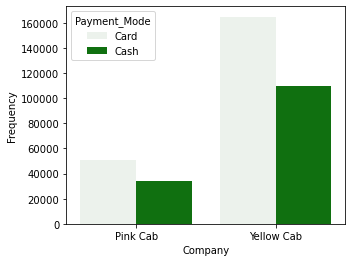

In [68]:
bar_plot(data,data['Company'], data['Payment_Mode'])

>**From the bar graph we can infer that the users is more for yellow cab. Also the payment mode preferred for both the companies is card than cash which means its better to invest in a company where advanced and digital technologies is being used.**

In [69]:
# Company vs gender analysis

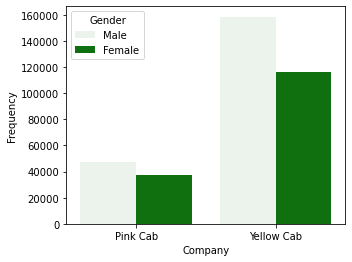

In [70]:
bar_plot(data, data['Company'],data['Gender'])

>**From this analysis there is a significant increase in male users than female users.**

In [71]:
# Company vs Year wise analysis

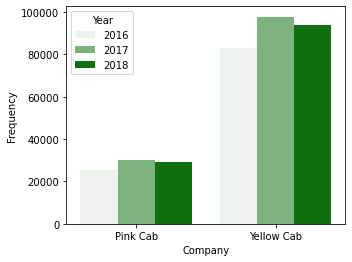

In [72]:
bar_plot(data, data['Company'], data['Year'].astype(str))

>**There is significant amount of increase in cab users as the year goes by and the no of users is higher in yellow cab**

In [73]:
# Visualising the Profit analysis of both companies

In [74]:
#lets visualize this profit difference
yellow_cab = data[data['Company']=='Yellow Cab']
yellow_cab_cost = yellow_cab.groupby('Year')['Cost_of_Trip'].mean()
yellow_cab_price = yellow_cab.groupby('Year')['Price_Charged'].mean()
print(yellow_cab_cost)

# Calculate the average cost of the trip and price charged for each year for Pink Cab
pink_cab = data[data['Company']=='Pink Cab']
pink_cab_cost = pink_cab.groupby('Year')['Cost_of_Trip'].mean()
pink_cab_price = pink_cab.groupby('Year')['Price_Charged'].mean()
print(pink_cab_cost)

Year
2016    298.536761
2017    297.861544
2018    297.442400
Name: Cost_of_Trip, dtype: float64
Year
2016    247.039209
2017    248.820917
2018    248.413839
Name: Cost_of_Trip, dtype: float64


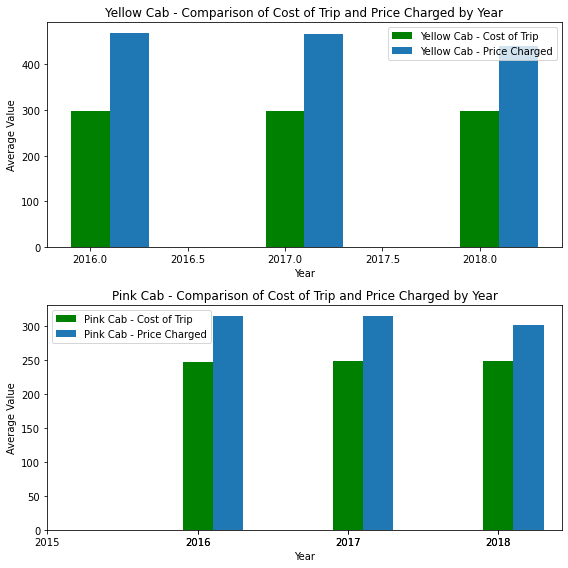

In [75]:
# Bar plots of Cost of trip and price charged for both cabs
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
bar_width=0.2

# Plotting for Yellow Cab
ax1.bar(yellow_cab_cost.index, yellow_cab_cost, bar_width, label='Yellow Cab - Cost of Trip', color='green')
ax1.bar(yellow_cab_price.index + bar_width, yellow_cab_price, bar_width, label='Yellow Cab - Price Charged')
plt.xticks([int(x) for x in ax1.get_xticks()])
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Value')
ax1.set_title('Yellow Cab - Comparison of Cost of Trip and Price Charged by Year')
ax1.legend(loc='best')


# Plotting for Pink Cab
ax2.bar(pink_cab_cost.index, pink_cab_cost, bar_width, label='Pink Cab - Cost of Trip', color='green')
ax2.bar(pink_cab_price.index + bar_width, pink_cab_price, bar_width, label='Pink Cab - Price Charged')
plt.xticks([int(x) for x in ax2.get_xticks()])
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Value')
ax2.set_title('Pink Cab - Comparison of Cost of Trip and Price Charged by Year')
ax2.legend()

plt.tight_layout()
plt.show()

### During the 3 year period the cost of trip and price charged is more for yellow cab than pink cab which means yellow cab is providing better plan for all kind of customers.

### Hence the client should invest in yellow cab.

In [76]:
data.to_csv('master_data.csv',index = False)